## No PCA, No Cross channel features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir("..") 
from scripts.train_and_test import load_and_preprocess_data, train_sklearn_classifiers, train_pytorch_classifiers, print_results
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(X_train_scaled, X_test_scaled, y_train, y_test)

pytorch_results = train_pytorch_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes)


Data shape: (7250, 30)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1037
Cu: 981
FEP: 1132
PE: 988
PET: 1004
PI: 1114
Paper: 994

Train set: 5800 samples
Test set: 1450 samples

SVM Accuracy: 0.6557 (+/- 0.0113)
KNN Accuracy: 0.9193 (+/- 0.0075)
Random Forest Accuracy: 0.9644 (+/- 0.0069)
Decision Tree Accuracy: 0.8720 (+/- 0.0084)
Simple NN (64) Accuracy: 0.9028
Medium NN (128-64) Accuracy: 0.9455
Deep NN (256-128-64) Accuracy: 0.8772


In [2]:
all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)


Model Accuracies:
  Random Forest                 : 0.9644
  Medium NN (128-64)            : 0.9455
  KNN                           : 0.9193
  Simple NN (64)                : 0.9028
  Deep NN (256-128-64)          : 0.8772
  Decision Tree                 : 0.8720
  SVM                           : 0.6557


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cms(results, label_encoder):
    class_names = label_encoder.classes_

    for name, metrics in results.items():
        cm = metrics.get("confusion_matrix")
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        acc = metrics.get("accuracy", None)
        plt.title(f"{name} Confusion Matrix - {acc:.4f}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

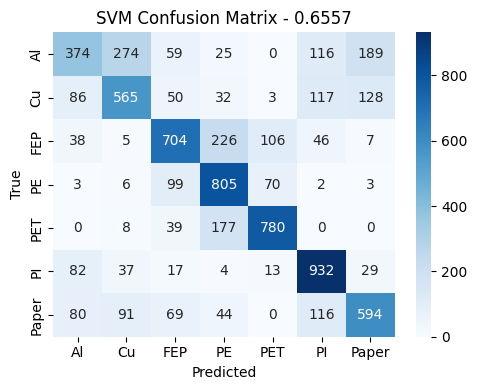

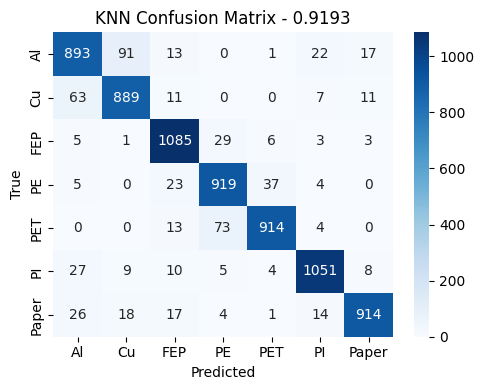

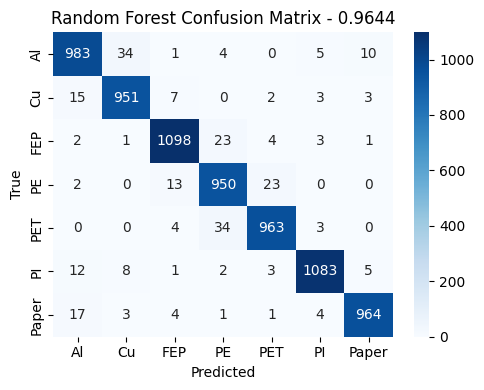

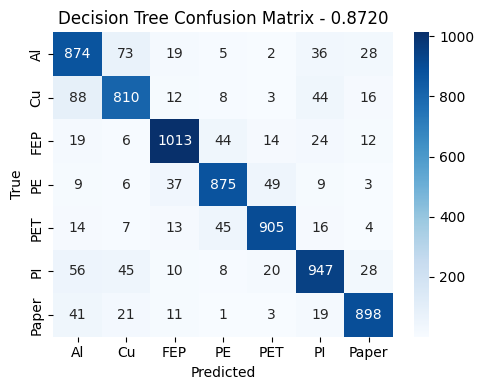

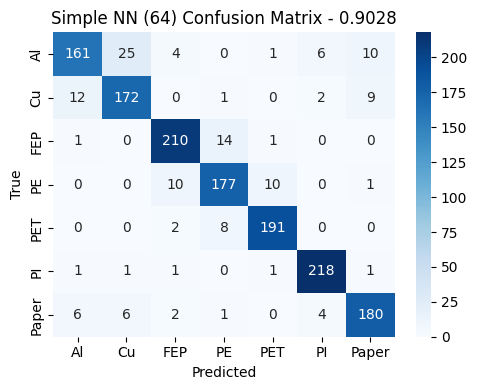

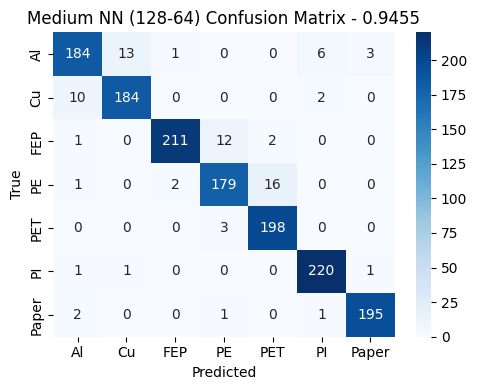

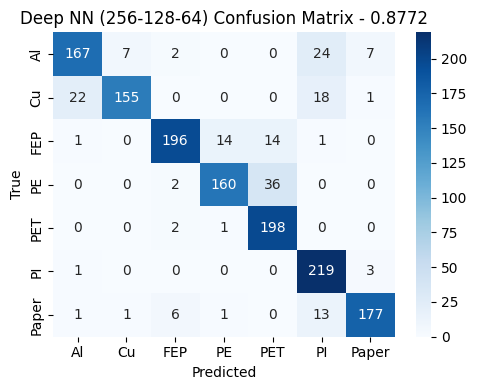

In [4]:
plot_cms(all_results, label_encoder)

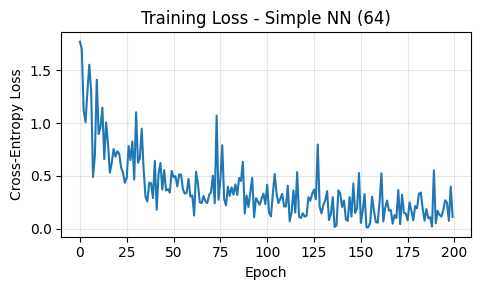

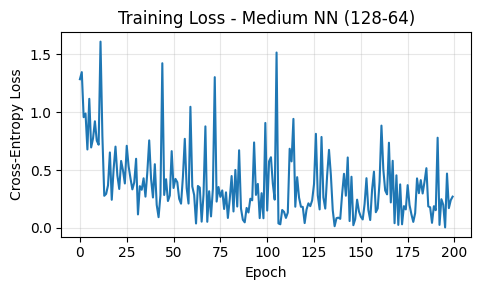

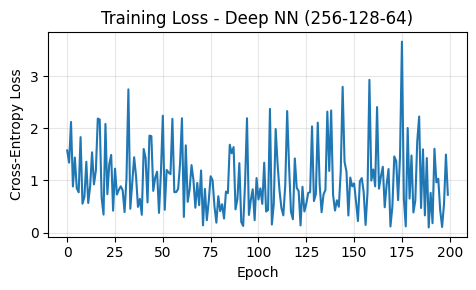

In [5]:
def plot_losses(results):
    for name, metrics in results.items():
        loss_hist = metrics.get("loss_history")
        if not loss_hist:
            continue

        plt.figure(figsize=(5, 3))
        plt.plot(loss_hist)
        plt.title(f"Training Loss - {name}")
        plt.xlabel("Epoch")
        plt.ylabel("Cross-Entropy Loss")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_losses(pytorch_results)

## With PCA, No Cross Channel Features

In [6]:
sklearn_results = train_sklearn_classifiers(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    pca=True, 
    n_components=0.95)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes, 
    pca=True, 
    n_components=0.95)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

PCA applied: 11 components, 0.9518 variance explained
SVM Accuracy: 0.6006 (+/- 0.0102)
KNN Accuracy: 0.9006 (+/- 0.0090)
Random Forest Accuracy: 0.9348 (+/- 0.0109)
Decision Tree Accuracy: 0.8674 (+/- 0.0074)
PCA applied: 11 components, 0.9513 variance explained
Simple NN (64) Accuracy: 0.8428
Medium NN (128-64) Accuracy: 0.9034
Deep NN (256-128-64) Accuracy: 0.5621

Model Accuracies:
  Random Forest                 : 0.9348
  Medium NN (128-64)            : 0.9034
  KNN                           : 0.9006
  Decision Tree                 : 0.8674
  Simple NN (64)                : 0.8428
  SVM                           : 0.6006
  Deep NN (256-128-64)          : 0.5621


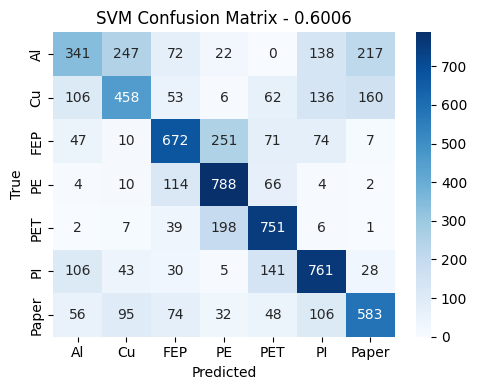

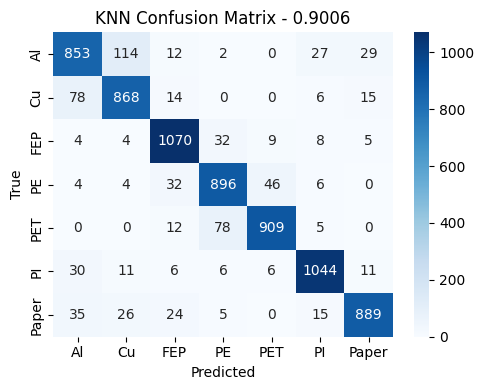

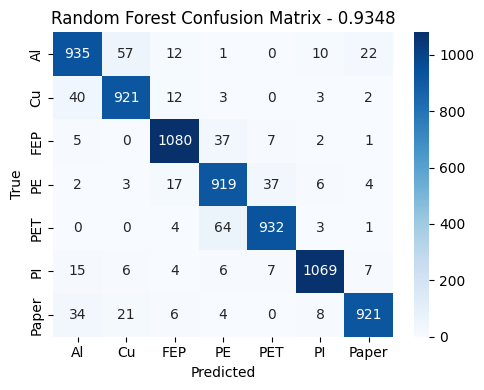

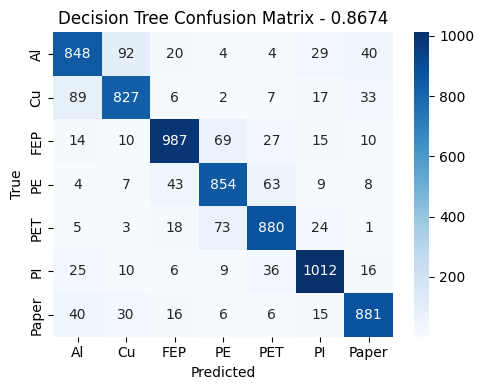

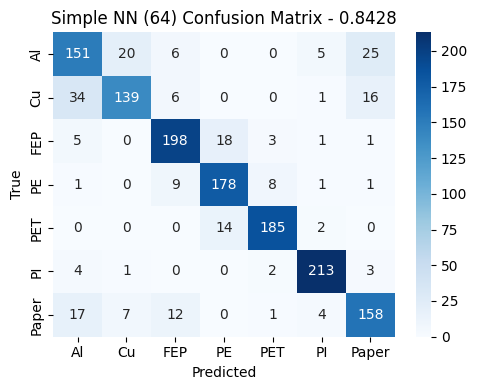

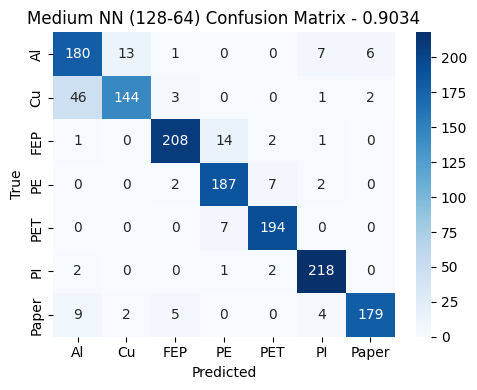

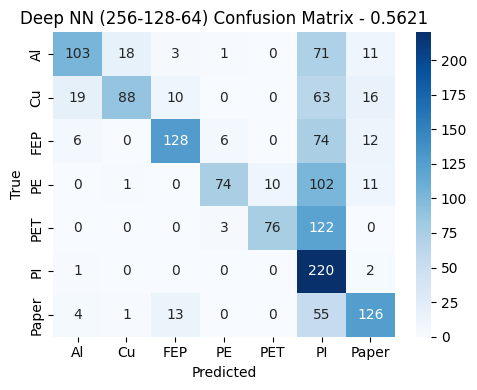

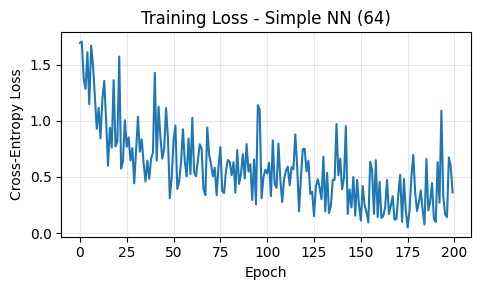

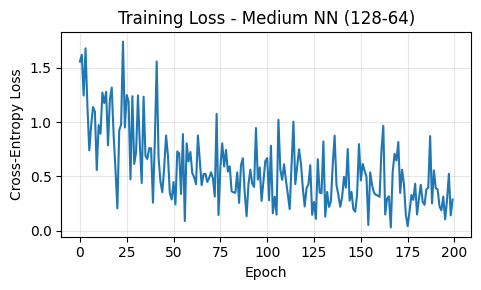

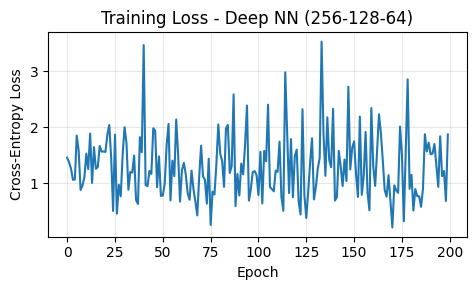

In [7]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)

## No PCA, With Cross Channel Features

In [8]:
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset_plus.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

Data shape: (7039, 85)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1007
Cu: 951
FEP: 1102
PE: 958
PET: 974
PI: 1082
Paper: 965

Train set: 5631 samples
Test set: 1408 samples

SVM Accuracy: 0.7833 (+/- 0.0081)
KNN Accuracy: 0.9173 (+/- 0.0069)
Random Forest Accuracy: 0.9882 (+/- 0.0057)
Decision Tree Accuracy: 0.9399 (+/- 0.0075)
Simple NN (64) Accuracy: 0.9624
Medium NN (128-64) Accuracy: 0.9645
Deep NN (256-128-64) Accuracy: 0.9659

Model Accuracies:
  Random Forest                 : 0.9882
  Deep NN (256-128-64)          : 0.9659
  Medium NN (128-64)            : 0.9645
  Simple NN (64)                : 0.9624
  Decision Tree                 : 0.9399
  KNN                           : 0.9173
  SVM                           : 0.7833


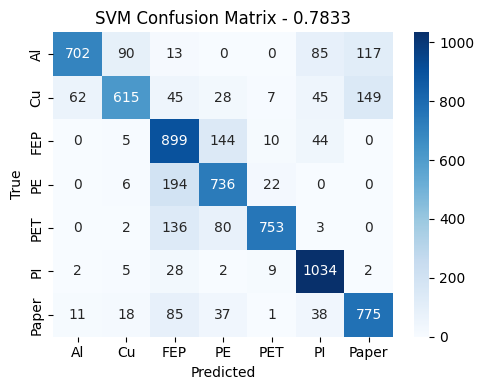

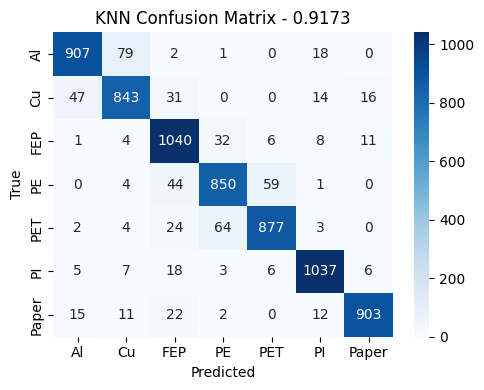

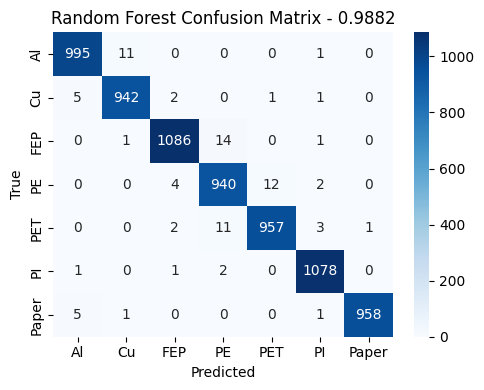

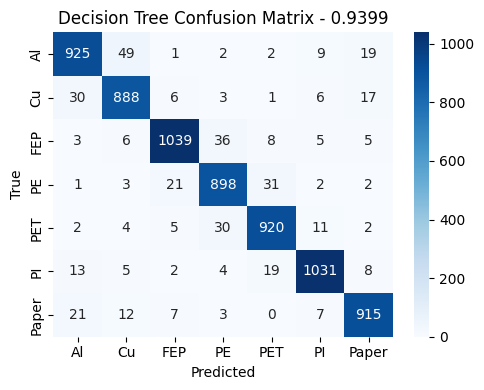

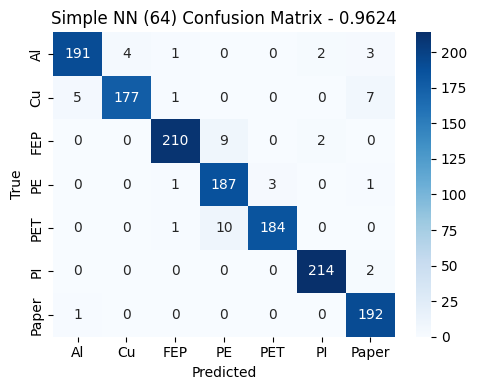

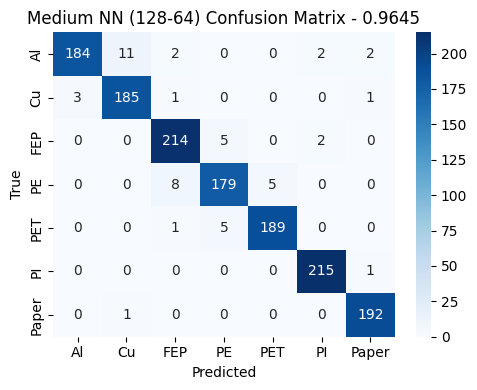

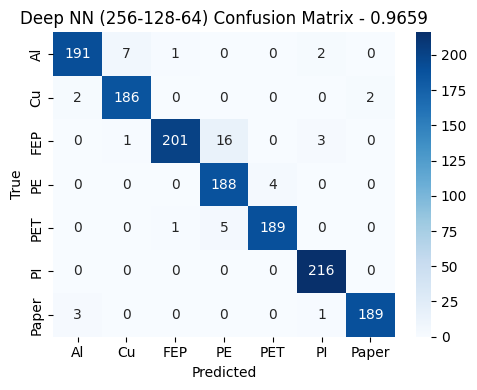

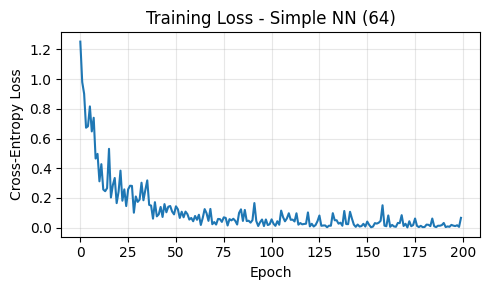

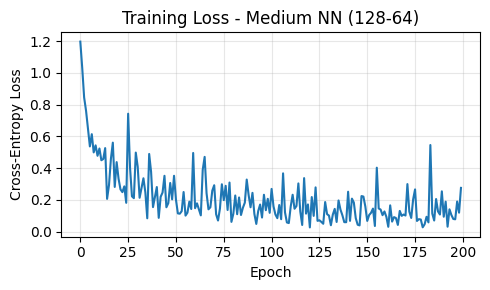

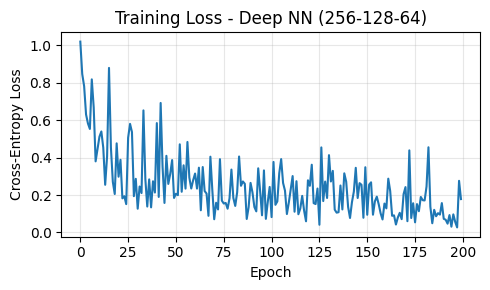

In [9]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)

## With PCA, With Cross Channel Features

In [11]:
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset_plus.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    pca=True, 
    n_components=0.95)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes, 
    pca=True, 
    n_components=0.95)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

Data shape: (7039, 85)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1007
Cu: 951
FEP: 1102
PE: 958
PET: 974
PI: 1082
Paper: 965

Train set: 5631 samples
Test set: 1408 samples

PCA applied: 21 components, 0.9553 variance explained
SVM Accuracy: 0.7412 (+/- 0.0131)
KNN Accuracy: 0.9152 (+/- 0.0122)
Random Forest Accuracy: 0.9298 (+/- 0.0130)
Decision Tree Accuracy: 0.8123 (+/- 0.0183)
PCA applied: 21 components, 0.9552 variance explained
Simple NN (64) Accuracy: 0.9254
Medium NN (128-64) Accuracy: 0.9467
Deep NN (256-128-64) Accuracy: 0.9219

Model Accuracies:
  Medium NN (128-64)            : 0.9467
  Random Forest                 : 0.9298
  Simple NN (64)                : 0.9254
  Deep NN (256-128-64)          : 0.9219
  KNN                           : 0.9152
  Decision Tree                 : 0.8123
  SVM                           : 0.7412


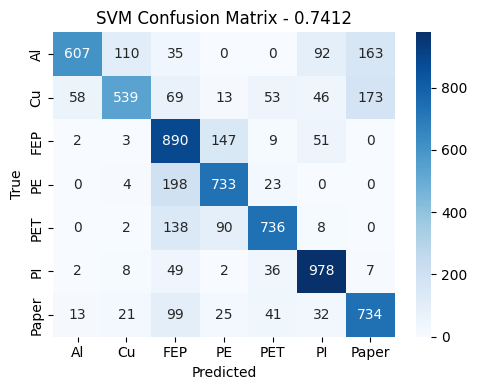

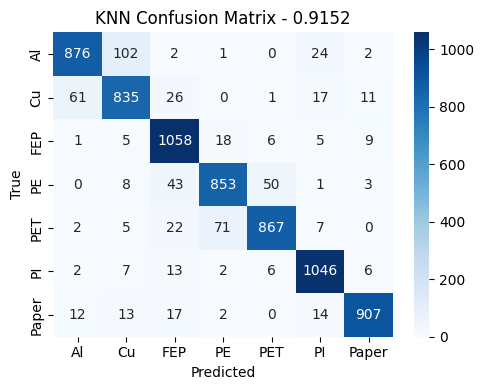

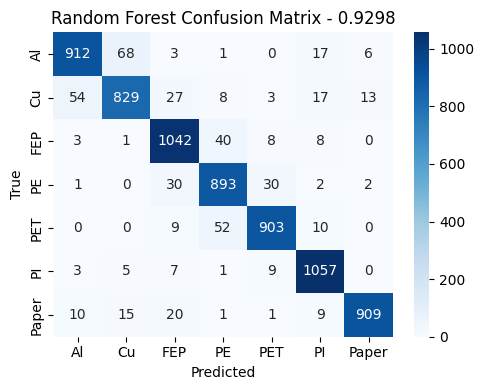

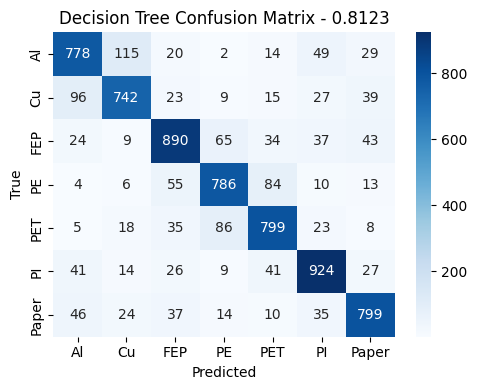

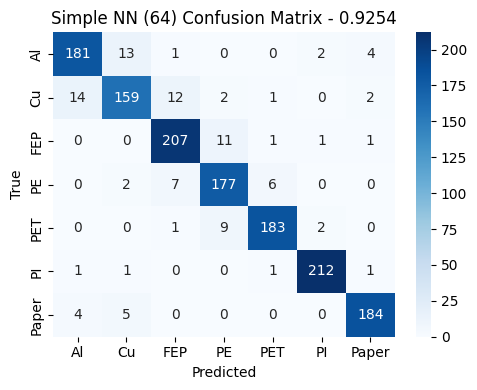

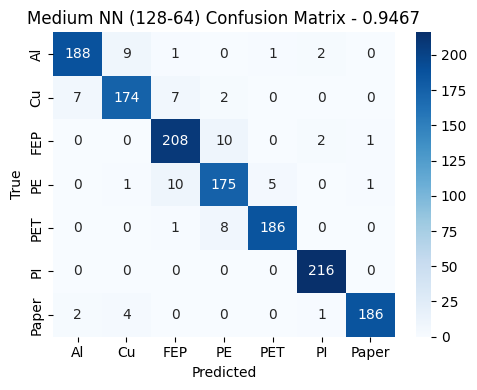

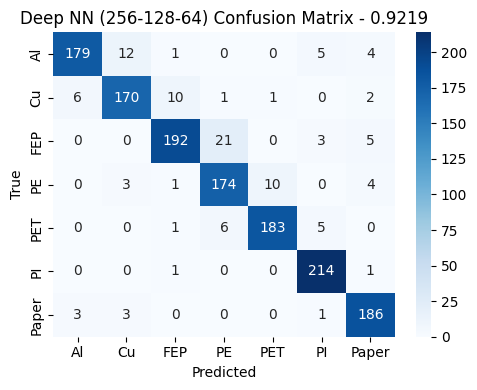

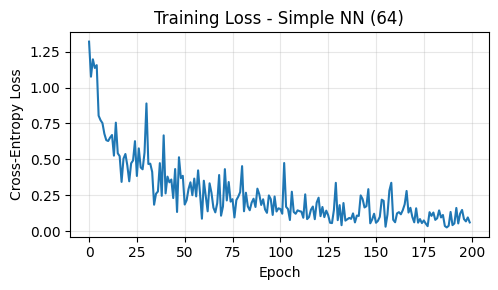

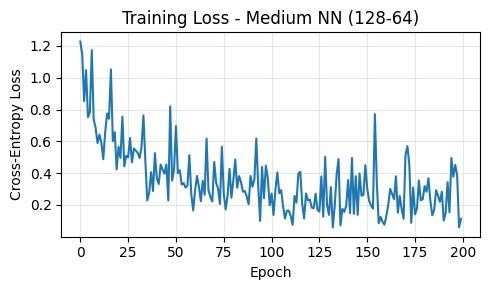

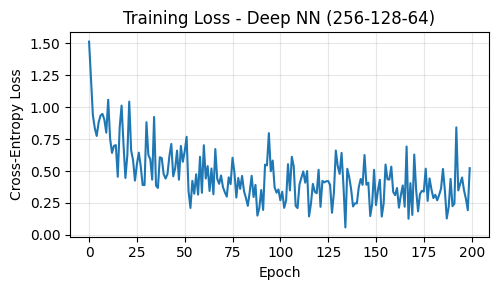

In [12]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)